In [1]:
import sys
sys.path.append('..')
from nbhd.data import Base
from nbhd.geography import Neighbourhood
from nbhd.geometry import cellularize

Initializing database connection...
Database connected!


In [2]:
n = Neighbourhood()

In [3]:
n.get_data()

Getting data took 0 minutes, 0 seconds.


In [4]:
n.tessellate()

In [5]:
from mapclassify import greedy

In [7]:
n.tiles['c'] = greedy(n.tiles)

In [9]:
import geopandas as gpd

In [10]:
boundary = gpd.GeoDataFrame(geometry=gpd.GeoSeries(n.geom.boundary))

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:>

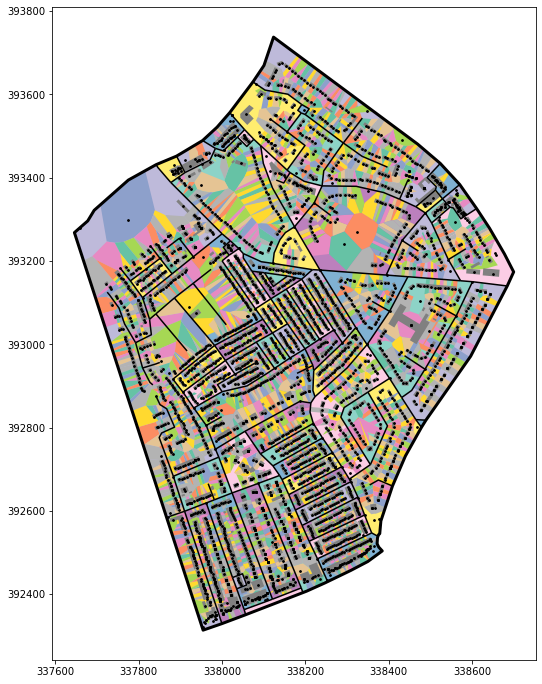

In [20]:
cmap='Set2'
fig, ax = plt.subplots(figsize=(12,12))
n.tiles.plot('c', ax=ax, cmap='Set3')
cells.plot('c', ax =ax, cmap=cmap)
n.roads.plot(color='k', ax=ax)
n.buildings.plot(color='grey', ax=ax)
n.uprn.plot(color='k', ax=ax, markersize=3)
boundary.plot(color='k', linewidth=3, ax=ax)

In [ ]:
# for each tile, we want voronoi cells

In [14]:
from pandas import concat

In [15]:
r = gpd.sjoin(n.tiles, n.uprn, op='contains')

cell_dfs = list()
for i in r.index.unique():
    try:
        l = r.loc[r.index==i].UPRN.values
        df =n.uprn.loc[n.uprn.UPRN.isin(l)].geometry
        cell_dfs.append(cellularize(df, r.loc[r.index==i].geometry.unique()[0]))
        cells = concat(cell_dfs)
    except Exception as e:
        print(i, e)

8 QH6214 qhull input error: not enough points(1) to construct initial simplex (need 4)

While executing:  | qhull v Qbb Qz Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1818128950  voronoi  Qbbound-last  Qz-infinity-point  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  _maxoutside  0

31 QH6214 qhull input error: not enough points(2) to construct initial simplex (need 4)

While executing:  | qhull v Qbb Qz Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1818145757  voronoi  Qbbound-last  Qz-infinity-point  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  _maxoutside  0



In [17]:
cells['c'] = greedy(cells)